In [1]:
from f2i import Flow
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
flow = Flow()
files = glob.glob('tmp/*.flo')
files

['tmp/frame_0003.flo',
 'tmp/frame_0004.flo',
 'tmp/frame_0005.flo',
 'tmp/frame_0001.flo',
 'tmp/frame_0002.flo']

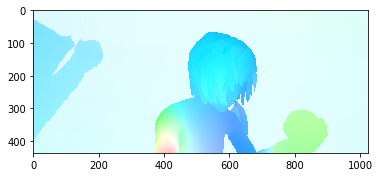

In [3]:
# Convert from [.flo] file
img = flow.convertFromFile(files[0]) # load flo from file
plt.imshow(img)

In [4]:
# Convert from [.flo] array
floArray = flow._readFlow(files[0]) # some random flo array
floArray[0]

array([[-1.7805868e+00,  1.2341932e-03],
       [-1.7770954e+00,  1.9168467e-03],
       [-1.7736086e+00,  2.5995362e-03],
       ...,
       [-1.3374407e+00,  5.9633011e-01],
       [-1.3393331e+00,  5.9686142e-01],
       [-1.3412286e+00,  5.9739268e-01]], dtype=float32)

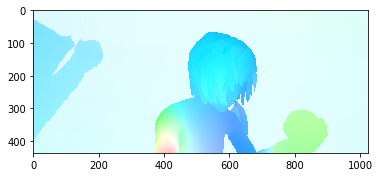

In [5]:
plt.imshow(flow.convertFromFlow(floArray))

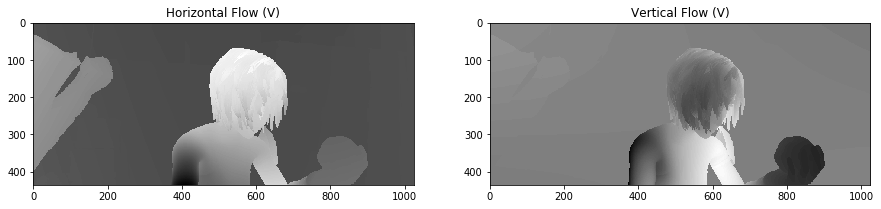

In [6]:
# Two channel image [u,v] with horizontal and vertical flows converted to UINT8
uv = flow.convertFromFlow(floArray, mode='UV')

f, axarr = plt.subplots(1,2)
f.set_size_inches(15, 5)

axarr[0].set_title('Horizontal Flow (V)')
axarr[0].imshow(uv[...,0],cmap=plt.get_cmap('binary'))
axarr[1].set_title('Vertical Flow (V)')
axarr[1].imshow(uv[...,1],cmap=plt.get_cmap('binary'))



In [23]:
import os

In [24]:
os.popen('python f2i.py tmp/*.flo -v -r 2 -o tmp/flows').read().split('\n')

['> Rendering images [.png] from the flows [.flo]',
 '> Compiling [.mp4] video from the flow images [.png]',
 '> Saving video as: tmp/flows/frame_0001.flo.mp4',
 '']